李健 2022310120012  
胡紫娜 2022310120010

In [1]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



In [2]:
#读取数据集
df =  pd.read_csv("E:\\QQ\\研究生课程小作业\\统计推断小作业\\bank-full.csv",sep=';')
df.shape

(45211, 17)

In [3]:
#查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#删除无关组
df1=df.drop(columns=['month','contact','poutcome','pdays'],axis=1)
df1

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,76,1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,92,1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,198,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,456,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,1127,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,508,4,0,no


In [5]:

#将布尔变量替换成0和1
df1.y.replace(('yes', 'no'), (1, 0), inplace=True)
df1.default.replace(('yes', 'no'), (1, 0), inplace=True)
df1.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df1.loan.replace(('yes', 'no'), (1, 0), inplace=True)
df1

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,previous,y
0,58,management,married,tertiary,0,2143,1,0,5,261,1,0,0
1,44,technician,single,secondary,0,29,1,0,5,151,1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,76,1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,5,92,1,0,0
4,33,unknown,single,unknown,0,1,0,0,5,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,17,977,3,0,1
45207,71,retired,divorced,primary,0,1729,0,0,17,456,2,0,1
45208,72,retired,married,secondary,0,5715,0,0,17,1127,5,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,17,508,4,0,0


对多分类的特征我们利用get_dummies函数来取哑变量进行数值编码；  
由于unknown没有实际的信息和意义，所以选择剔除其中的unknown变量

In [6]:
#特征提取--将分类变量转化为计算机可识别的哑变量型数值编码
df2 = pd.get_dummies(df1)
df2.head()
list(df2)

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'previous',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown']

In [7]:
#对变量进行描述统计
df3=df2.drop(columns=['job_unknown','education_unknown','marital_divorced'],axis=1)
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [8]:
#查看各个变量与目标特征y之间的相关性。
plt.figure(figsize=(14,8))
df3.corr()['y']

age                    0.025155
default               -0.022419
balance                0.052838
housing               -0.139173
loan                  -0.068185
day                   -0.028348
duration               0.394521
campaign              -0.073172
previous               0.093236
y                      1.000000
job_admin.             0.005637
job_blue-collar       -0.072083
job_entrepreneur      -0.019662
job_housemaid         -0.015195
job_management         0.032919
job_retired            0.079245
job_self-employed      0.000855
job_services          -0.027864
job_student            0.076897
job_technician        -0.008970
job_unemployed         0.020390
marital_married       -0.060260
marital_single         0.063526
education_primary     -0.040393
education_secondary   -0.036388
education_tertiary     0.066448
Name: y, dtype: float64

<Figure size 1008x576 with 0 Axes>

<AxesSubplot:>

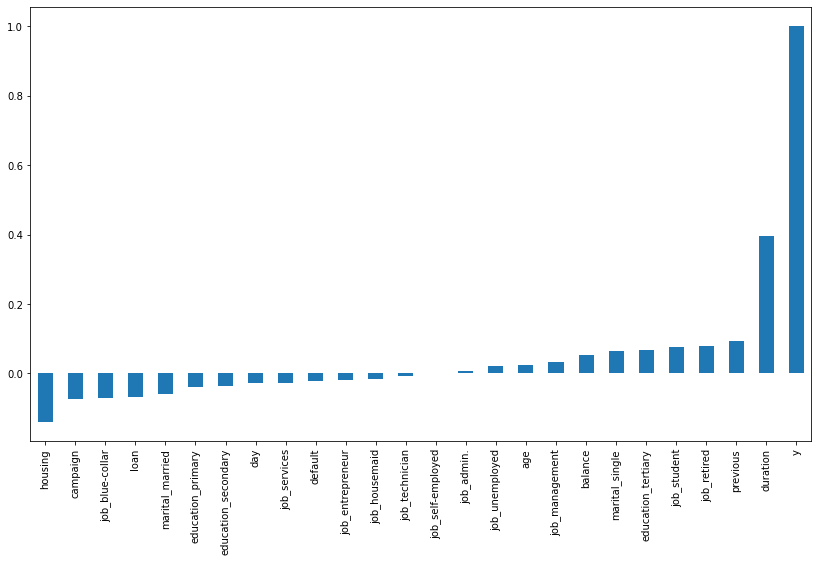

In [9]:
#对相关性进行降序绘图如下
plt.figure(figsize=(14,8))
df3.corr()['y'].sort_values(ascending = True).plot(kind='bar')

In [10]:
#创建二分类目标
df_target=df3[['y']].values
df_features=df3.drop(columns=['y'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 0)

In [11]:
# 对数据进行标准化
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

## SVM模型

In [44]:
#创建SVM模型
print('@'*15,'MODEL SVM','@'*15,end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(x1_train, y1_train)

#K折交叉验证（5）
accuracies = cross_val_score(estimator = lsvclassifier, X = x1_train, y = y1_train, cv = 5)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

#评估
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear*100,end='\n')

#测试集上预测
y_predl = lsvclassifier.predict(x1_test)

#输出混淆矩阵（对预测结果输出包括 precision  recall  f1-score  support（被分入到某一类的支持项））
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

MODEL SVM


d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\python\lib\site-packa

After 5 fold cross validation:
Mean of Accuracies:  88.32748772732253
Standard deviation of Accuracies 0.006008093966137762
Test Output:
Confusion Matrix:
[[11969     0]
 [ 1595     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

Accuracy:  0.8824093187850192


d:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## naive_bayes模型

In [31]:
from sklearn.naive_bayes import GaussianNB
#创建bayes模型
print('@'*15,'native_bayes Model','@'*15,end='\n')
clf = GaussianNB()#BY
clf.fit(x1_train, y1_train)

#K折交叉验证（5）
accuracies = cross_val_score(estimator = clf, X = x1_train, y = y1_train, cv = 5)
mean_clf=accuracies.mean()
std_clf=accuracies.std()

#评估
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_clf*100,end='\n')
print('Standard deviation of Accuracies',std_clf*100,end='\n')

#测试集上预测
y_predl = clf.predict(x1_test)

#输出混淆矩阵（对预测结果输出包括 precision  recall  f1-score  support（被分入到某一类的支持项）））
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

native_bayes Model
After 5 fold cross validation:
Mean of Accuracies:  83.40758218955997
Standard deviation of Accuracies 0.49175791843531197
Test Output:
Confusion Matrix:


d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\python\lib\site-packa

[[10546  1423]
 [  915   680]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     11969
           1       0.32      0.43      0.37      1595

    accuracy                           0.83     13564
   macro avg       0.62      0.65      0.63     13564
weighted avg       0.85      0.83      0.84     13564

Accuracy:  0.8276319669713949


## LogisticRegression模型

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

#创建Logistic模型
print('@'*15,'logistic Model','@'*15,end='\n')
regressor = LogisticRegression()#LR
rfe = RFE(regressor, 20)#RFE反复构建LR模型，并递归选择最好的特征
rfe = rfe.fit(x1_train, y1_train)


#K折交叉验证（5）
accuracies = cross_val_score(estimator = rfe, X = x1_train, y = y1_train, cv = 5)
mean_lr=accuracies.mean()
std_lr=accuracies.std()

#评估
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_lr*100,end='\n')
print('Standard deviation of Accuracies',std_lr*100,end='\n')

#测试集上预测
y_predl = rfe.predict(x1_test)

#输出混淆矩阵（对预测结果输出包括 precision  recall  f1-score  support（被分入到某一类的支持项））
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

logistic Model


d:\python\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(

After 5 fold cross validation:
Mean of Accuracies:  89.08270138435951
Standard deviation of Accuracies 0.196389995490862
Test Output:
Confusion Matrix:
[[11710   259]
 [ 1277   318]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.55      0.20      0.29      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564

Accuracy:  0.8867590681214981


## 随机森林模型

In [33]:
#创建随机森林模型
print('@'*15,'RandomForestClassifier','@'*15,end='\n')

estimator = DecisionTreeClassifier(criterion='entropy',max_depth=5)     # 选择信息增益方法画树，最大树深限制为5
rfe = RFE(estimator, 20)#RFE反复构建随机森林模型，并递归选择最好的特征
rfe = rfe.fit(x1_train, y1_train)


#K折交叉验证（5）
accuracies = cross_val_score(estimator = rfe, X = x1_train, y = y1_train, cv = 5)
mean_lr=accuracies.mean()
std_lr=accuracies.std()

#评估
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_lr*100,end='\n')
print('Standard deviation of Accuracies',std_lr*100,end='\n')

#测试集上预测
y_predl = rfe.predict(x1_test)

#输出混淆矩阵（对预测结果输出包括 precision  recall  f1-score  support（被分入到某一类的支持项））
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

RandomForestClassifier


d:\python\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


After 5 fold cross validation:
Mean of Accuracies:  89.11113740331686
Standard deviation of Accuracies 0.1791032842093661
Test Output:
Confusion Matrix:
[[11605   364]
 [ 1179   416]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11969
           1       0.53      0.26      0.35      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.62      0.64     13564
weighted avg       0.86      0.89      0.87     13564

Accuracy:  0.8862429961663226


## 梯度提升树模型

In [58]:
# 创建梯度提升树
from sklearn.ensemble import GradientBoostingClassifier
classifiergb = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
classifiergb.fit(x1_train, y1_train)

# 设计10折交叉验证
accuracies = cross_val_score(estimator = classifiergb, X = x1_train, y = y1_train, cv = 10,n_jobs=-1)
mean_boosting=accuracies.mean()
std_boosting=accuracies.std()

# 输出交叉验证后的平均准确率和准确率标准差
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_boosting*100,end='\n')
print('Standard deviation of Accuracies',std_boosting*100,end='\n')

# 分类预测
y_predgb = classifiergb.predict(x1_test)

#混淆矩阵及评价指标
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test, y_predgb))
print('Classification Report:')
print(sk.classification_report(y1_test, y_predgb))
print('Accuracy: ',sk.accuracy_score(y1_test,y_predgb))

d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


After 5 fold cross validation:
Mean of Accuracies:  88.32748855109716
Standard deviation of Accuracies 0.014645713081277767
Test Output:
Confusion Matrix:
[[11969     0]
 [ 1595     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

Accuracy:  0.8824093187850192


d:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 模型对比总结与分析

In [71]:
models=['SVM','bayes','logistic','randomforest','GDBT']

Comparison_of_evaluation_results=[[88.32748772732253,0.006008093966137762,0.94,0.00,0.8824093187850192],[83.40758218955997,0.49175791843531197,0.90,0.37,0.8276319669713949],[89.08270138435951,0.196389995490862,0.94 ,0.29,0.8867590681214981],[89.11113740331686,0.1791032842093661, 0.94,0.35,0.8862429961663226],[88.32748855109716,0.014645713081277767,0.94,0.00,0.8824093187850192]]
compare = pd.DataFrame(Comparison_of_evaluation_results,index=models,columns=['交叉验证平均准确率','交叉验证准确率标准差','0-label-f1-score','1-label-f1-score','Accuracy']) 
compare

,交叉验证平均准确率,交叉验证准确率标准差,0-label-f1-score,1-label-f1-score,Accuracy
SVM,88.327488,0.006008,0.94,0.00,0.882409
bayes,83.407582,0.491758,0.90,0.37,0.827632
logistic,89.082701,0.196390,0.94,0.29,0.886759
randomforest,89.111137,0.179103,0.94,0.35,0.886243
GDBT,88.327489,0.014646,0.94,0.00,0.882409


### 变量选择
由于bank-full中month：表示上一次联系客户的月份；contact：表示与客户之间的联系对话方式；poutcome：之前营销活动的结果；pdays：自上一次营销活动联系后，至今的天数。直观上认为这些特征对于目标变量(用户是否会购买产品)的影响很小，相较于其他特征的影响可以忽略。

下面是利用svm算法做的分类训练，可以看到虽然全变量模型的交叉验证的平均准确率略高，但是它的交叉验证准确率的标准差更大，所以说剔除这几个特征可以增强模型的鲁棒性  
After 5 fold cross validation:  *(Not eliminate variables)*  
Mean of Accuracies:  89.42080500576972  
Standard deviation of Accuracies   ***0.3422686800174632***  

After 5 fold cross validation:  *(eliminate variables)*  
Mean of Accuracies:  88.32748772732253  
Standard deviation of Accuracies   ***0.006008093966137762*** 


### 对非数值型特征进行转化的方法
对二分类的特征 *(比如'y','default','housing','loan')* 进行0-1编码  
对多分类的字符特征转化为哑变量实现数值编码  
对多分类的特征我们利用get_dummies函数来取哑变量进行数值编码；  


### 数据处理
由于unknown没有实际的信息和意义，所以选择剔除其中的unknown变量，即剔除dummy variable中的*_unknown变量  
同时对于marital特征中divorced这一类值只占到10%左右，所以这里把divorce剔除掉，把marital转化为0-1分类处理，简化模型处理

### 模型结果对比分析
从5折交叉验证的平均准确率对比上来看，SVM、Logistic、RandomForest、GDBT在该数据集上都呈现比较好的预测稳定性，而Bayes分类器在划分验证集上的平均准确率就要略低一些  
再从交叉验证准确率的标准差上来看，SVM和集成方法GDBT的稳健性更好，而Bayes模型的验证准确率在不同验证集上波动比较大  
综合以上两点可以得出模型预测比较的结论：SVM算法与GDBT算法属于五个预测模型中的第一梯队，都有很好的预测准确率且预测的波动都很小，其中SVM的波动略小于GDBT  
Bayes模型在该数据集上的分类预测效果无论是从准确率的稳健性和波动上来看都是效果上最差的，所以在模型选择时作为最后一梯队

另外从F1-score来看，五个模型在0-label上都比较好，但是在1-label上效果都很差，分析原因可能是由于数据的不均衡性所导致的，目标值y这一列yes:no = 1:9  

***所以后期可能在输入的数据的均衡性上做改进，例如：采用一定的比例权重来控制输入yes和no样本的次数，比例值分别可取sum(no)/len(y)、sum(yes)/len(y)***  
***也可以在特征选择上再进一步分析，采用逐步回归方法以及方差扩大因子来检测特征，并剔除掉一些共线性非常严重的特征变量***
